In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load weather df and count df
weather_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weather.csv')
count_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/count.csv')
print(weather_df.head())
print(count_df.head())

# Check valid count
unique_counts = count_df["count"].unique()
print(unique_counts)
unique_temp = weather_df["avg_temp"].unique()
print(unique_temp)


# Drop any rows having unvalid count
count_df = count_df[count_df["count"] >= 0]

# Check valid count
unique_counts = count_df["count"].unique()
print(unique_counts)

   Unnamed: 0        Date  max_temp  min_temp  avg_temp  temp_departure   HDD  \
0           0  2025-01-27      46.0      19.0      32.5            -1.2  32.0   
1           1  2025-01-28      48.0      23.0      35.5             1.7  29.0   
2           2  2025-01-29      50.0      27.0      38.5             4.6  26.0   
3           3  2025-01-30      57.0      26.0      41.5             7.6  23.0   
4           4  2025-02-03      36.0      24.0      30.0            -4.3  35.0   

   CDD Precipitation New Snow Snow Depth  
0  0.0          0.00      0.0          0  
1  0.0          0.00      0.0          0  
2  0.0          0.00      0.0          0  
3  0.0          0.00      0.0          0  
4  0.0          0.00      0.0          0  
         date  count   type
0  2025-01-27     64  small
1  2025-01-28    202    big
2  2025-01-29     65  small
3  2025-01-30    201    big
4  2025-02-03     64  small
[ 64 202  65 201 188  60  -1 135 132  69 142  98 122  47 107  38 113  44
 116  94  43  

In [ ]:
# Merge into one data
weather_df.rename(columns={"Date": "date"}, inplace=True)
df = pd.merge(weather_df, count_df, on='date')
print(df.head())

   Unnamed: 0        date  max_temp  min_temp  avg_temp  temp_departure   HDD  \
0           0  2025-01-27      46.0      19.0      32.5            -1.2  32.0   
1           1  2025-01-28      48.0      23.0      35.5             1.7  29.0   
2           2  2025-01-29      50.0      27.0      38.5             4.6  26.0   
3           3  2025-01-30      57.0      26.0      41.5             7.6  23.0   
4           4  2025-02-03      36.0      24.0      30.0            -4.3  35.0   

   CDD Precipitation New Snow Snow Depth  count   type  
0  0.0          0.00      0.0          0     64  small  
1  0.0          0.00      0.0          0    202    big  
2  0.0          0.00      0.0          0     65  small  
3  0.0          0.00      0.0          0    201    big  
4  0.0          0.00      0.0          0     64  small  


In [ ]:
# Split two class big and small
big_df = df[df['type'] == 'big']
small_df = df[df['type'] == 'small']
big_df = big_df.reset_index(drop=True)
small_df = small_df.reset_index(drop=True)
print(big_df.tail())
print(small_df.tail())

    Unnamed: 0        date  max_temp  min_temp  avg_temp  temp_departure  \
13          23  2025-04-03      58.0      44.0      51.0             1.0   
14          24  2025-04-08      44.0      36.0      40.0           -11.9   
15          26  2025-04-10      53.0      38.0      45.5            -7.1   
16          29  2025-04-22      74.0      55.0      64.5             7.6   
17          31  2025-04-24      77.0      46.0      61.5             3.9   

     HDD  CDD Precipitation New Snow Snow Depth  count type  
13  14.0  0.0          0.01      0.0        0.0     95  big  
14  25.0  0.0          0.33      0.0        0.0    129  big  
15  19.0  0.0          0.00      0.0        0.0    100  big  
16   0.0  0.0          0.00      0.0        0.0    113  big  
17   3.0  0.0          0.00      0.0        0.0     84  big  
    Unnamed: 0        date  max_temp  min_temp  avg_temp  temp_departure  \
9           22  2025-03-31      80.0      61.0      70.5            21.7   
10          25  202

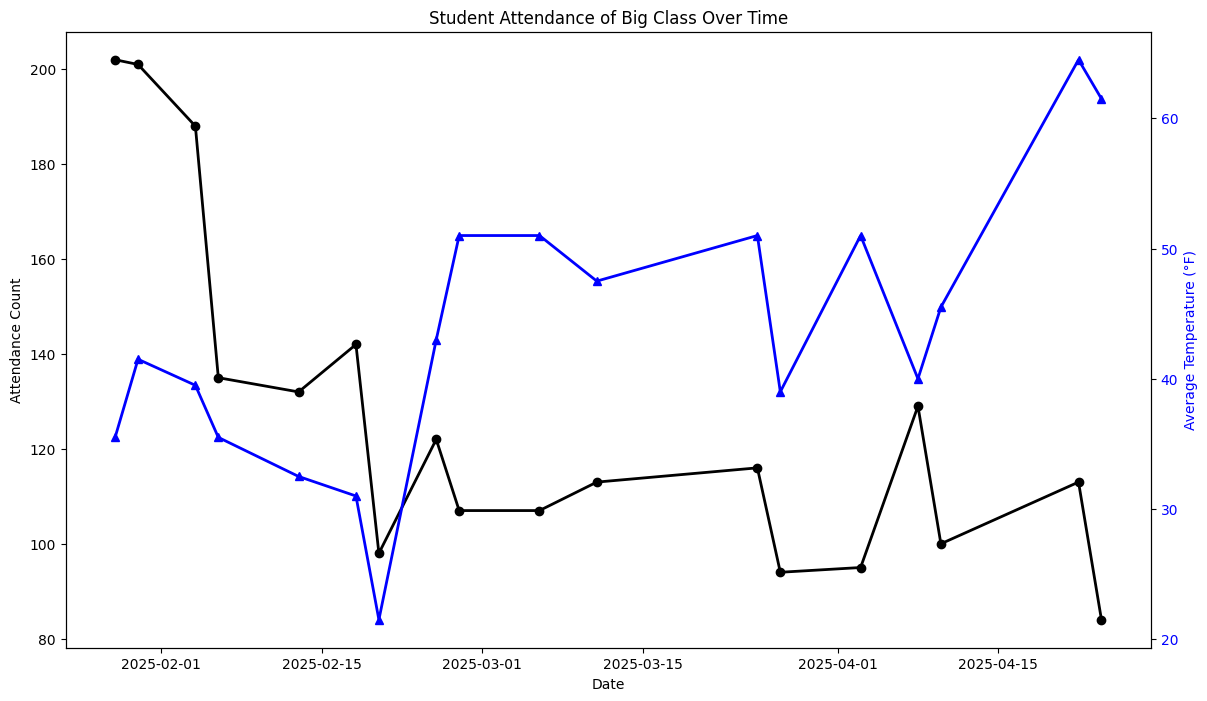

In [ ]:
import matplotlib.pyplot as plt

# Convert date to datetime
big_df["date"] = pd.to_datetime(big_df["date"])

# Plot attendance count
plt.figure(figsize=(14, 8))
plt.plot(big_df["date"], big_df["count"], color="black", linewidth=2, marker="o", label="Attendance Count")
plt.title("Student Attendance of Big Class Over Time")
plt.xlabel("Date")
plt.ylabel("Attendance Count", color="black")

# Create a secondary y-axis for average temperature
ax2 = plt.gca().twinx()
ax2.plot(big_df["date"], big_df["avg_temp"], color="blue", linewidth=2, marker="^", label="Avg Temperature")
ax2.set_ylabel("Average Temperature (°F)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

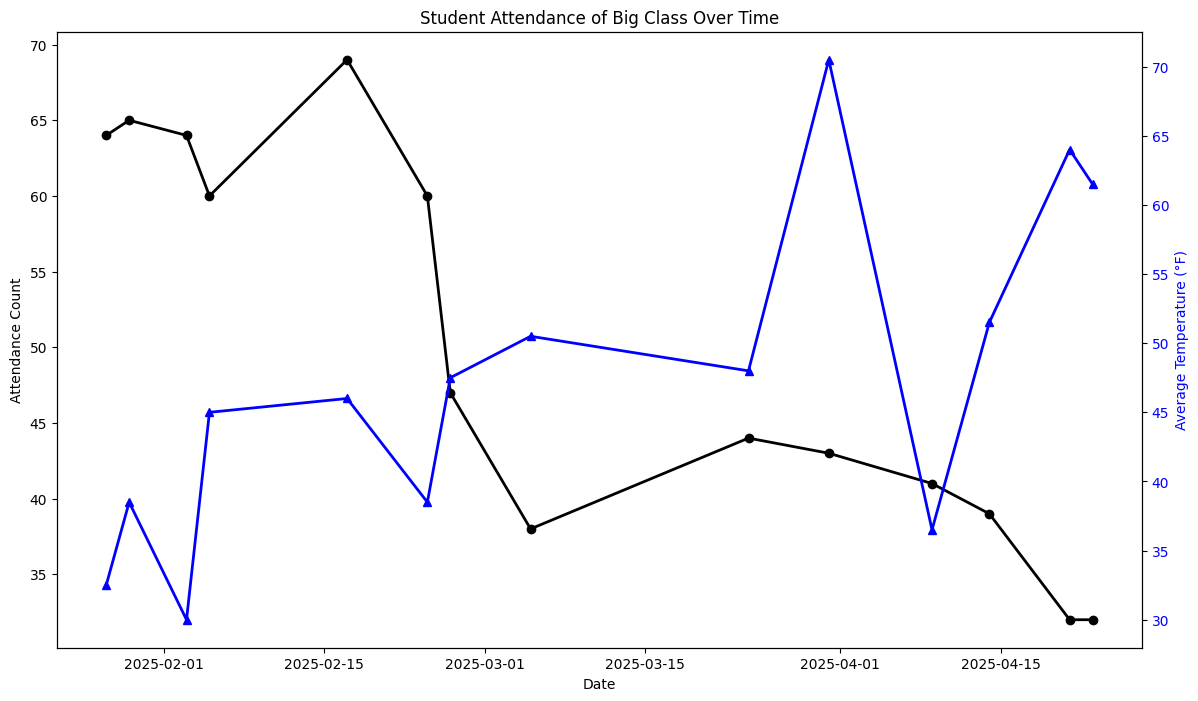

In [ ]:
# Convert date to datetime
small_df["date"] = pd.to_datetime(small_df["date"])

# Plot attendance count
plt.figure(figsize=(14, 8))
plt.plot(small_df["date"], small_df["count"], color="black", linewidth=2, marker="o", label="Attendance Count")
plt.title("Student Attendance of Big Class Over Time")
plt.xlabel("Date")
plt.ylabel("Attendance Count", color="black")

# Create a secondary y-axis for average temperature
ax2 = plt.gca().twinx()
ax2.plot(small_df["date"], small_df["avg_temp"], color="blue", linewidth=2, marker="^", label="Avg Temperature")
ax2.set_ylabel("Average Temperature (°F)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

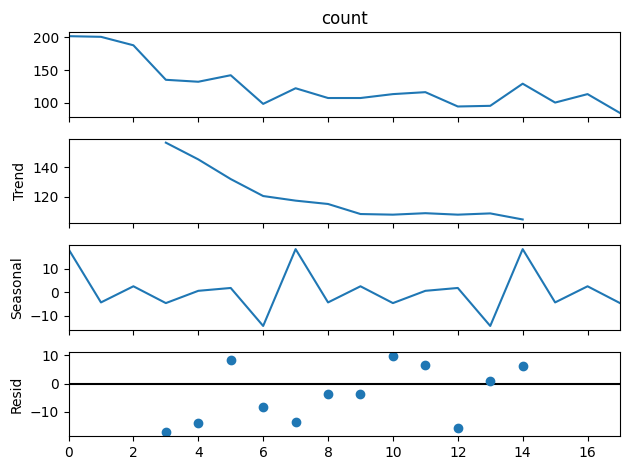

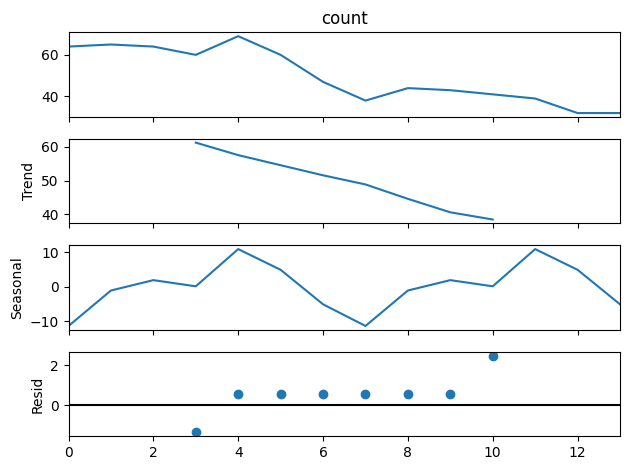

In [ ]:
import statsmodels.api as sm
big_decomposition = sm.tsa.seasonal_decompose(big_df['count'], model='additive', period=7)
small_decomposition = sm.tsa.seasonal_decompose(small_df['count'], model='additive', period=7)
# Plot the decomposition
big_decomposition.plot()
plt.show()
small_decomposition.plot()
plt.show()

In [ ]:

from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

adf_test = adfuller(big_df['count'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

adf_test_S = adfuller(small_df['count'])
# Output the results
print('ADF Statistic: %f' % adf_test_S[0])
print('p-value: %f' % adf_test_S[1])
# Diff
small_df['count_diff'] = small_df['count'].diff()
adf_test_new = adfuller(small_df['count_diff'].dropna())
print('ADF Statistic: %f' % adf_test_new[0])
print('p-value: %f' % adf_test_new[1])

ADF Statistic: -3.043493
p-value: 0.031028
ADF Statistic: -1.564906
p-value: 0.501194
ADF Statistic: -2.969091
p-value: 0.037884


Data Length: 18


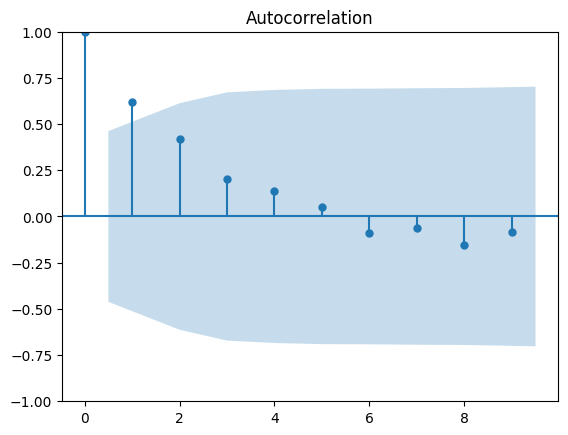

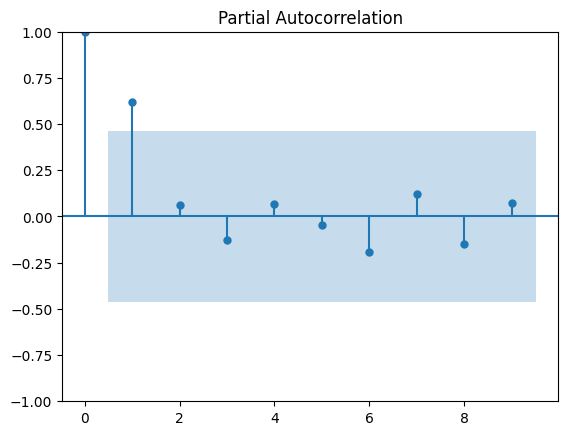

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Check the length of big class data
print(f"Data Length: {len(big_df['count'])}")
plot_acf(big_df['count'], lags=9)
plot_pacf(big_df['count'], lags=9)
plt.show()

In [ ]:
# ARIMA for big class
from statsmodels.tsa.arima.model import ARIMA

# (3,0,3) (p,d,q) third bar and zero diff for big class
exogenous_data = big_df['avg_temp']
model = ARIMA(big_df['count'], order=(3, 0, 3), exog=exogenous_data)
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                   18
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 -80.917
Date:                Fri, 09 May 2025   AIC                            179.834
Time:                        01:39:22   BIC                            187.847
Sample:                             0   HQIC                           180.939
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.3584     90.271      1.333      0.182     -56.569     297.285
avg_temp       0.1321      1.767      0.075      0.940      -3.331       3.595
ar.L1         -0.1232      0.514     -0.239      0.8

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Data Length: 14


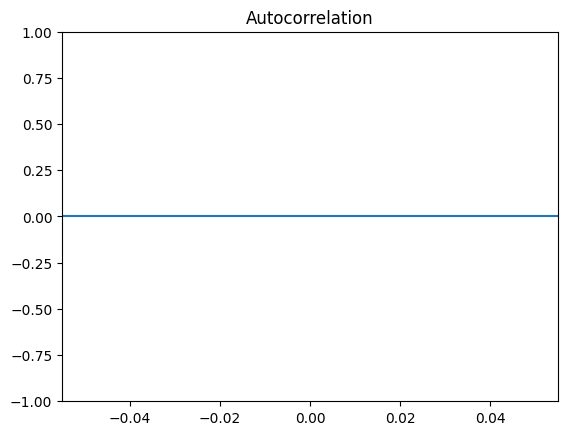

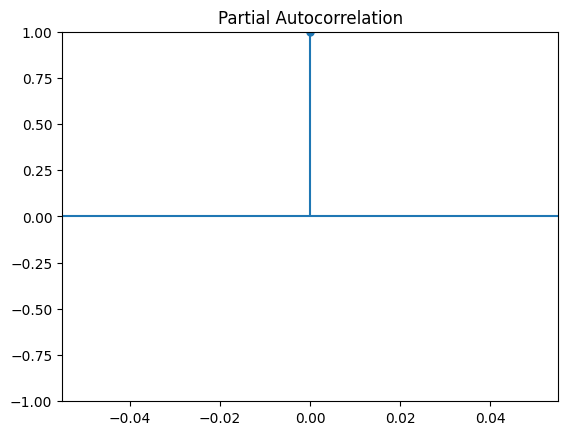

In [ ]:
# Check the length of small class data
print(f"Data Length: {len(small_df['count_diff'])}")
plot_acf(small_df['count_diff'], lags=6)
plot_pacf(small_df['count_diff'], lags=6)
plt.show()

In [ ]:
# ARIMA for small class
from statsmodels.tsa.arima.model import ARIMA

# (3,0,3) (p,d,q) third bar and zero diff for big class
exogenous_data = small_df['avg_temp']
model_S = ARIMA(small_df['count_diff'], order=(1, 1, 1), exog=exogenous_data)
small_model_fit = model_S.fit()
print(small_model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:             count_diff   No. Observations:                   14
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -47.781
Date:                Fri, 09 May 2025   AIC                            103.562
Time:                        01:48:31   BIC                            105.822
Sample:                             0   HQIC                           103.097
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
avg_temp      -0.0264      0.333     -0.079      0.937      -0.679       0.626
ar.L1          0.0684      0.388      0.176      0.860      -0.692       0.829
ma.L1         -0.9996    206.836     -0.005      0.9

Data explore
Data cleaning
Data malnipulate
Talking about Arima vs Sarima
ETE Decomposition
Check  the stationary (dif)
Parameter
Arima model
Result



MSE: 682.9382482296153, MAE: 19.375513737876915


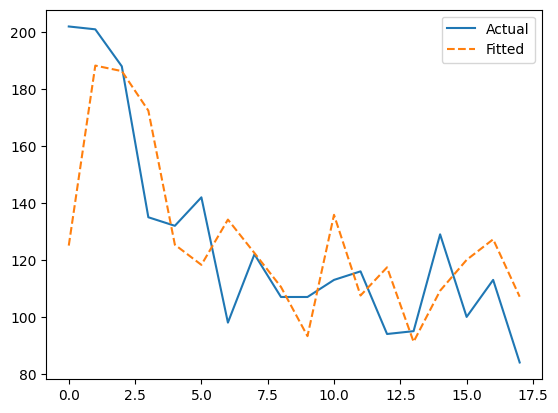

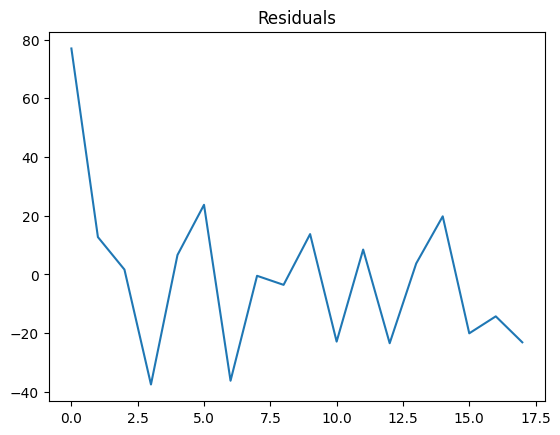

In [ ]:
# Big class evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(big_df['count'], model_fit.fittedvalues)
mae = mean_absolute_error(big_df['count'], model_fit.fittedvalues)

print(f"MSE: {mse}, MAE: {mae}")

plt.plot(big_df['count'], label="Actual")
plt.plot(model_fit.fittedvalues, label="Fitted", linestyle="--")
plt.legend()
plt.show()

residuals = model_fit.resid

# Plot residuals to check for randomness
plt.plot(residuals)
plt.title("Residuals")
plt.show()

MSE: 2788.948742349414, MAE: 51.527636926800405


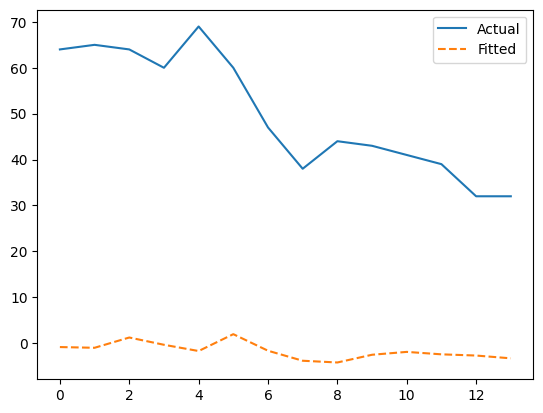

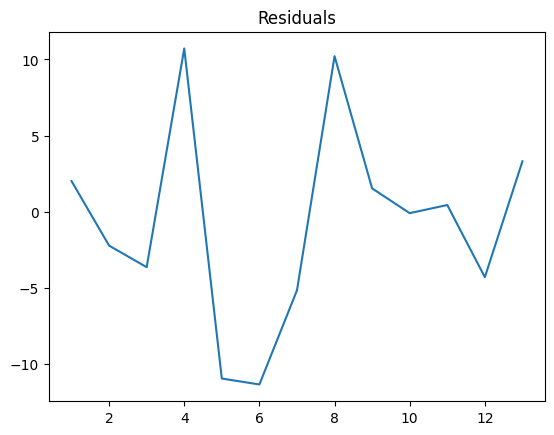

In [ ]:
# Small class evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

s_mse = mean_squared_error(small_df['count'], small_model_fit.fittedvalues)
s_mae = mean_absolute_error(small_df['count'], small_model_fit.fittedvalues)

print(f"MSE: {s_mse}, MAE: {s_mae}")

plt.plot(small_df['count'], label="Actual")
plt.plot(small_model_fit.fittedvalues, label="Fitted", linestyle="--")
plt.legend()
plt.show()

residuals = small_model_fit.resid

# Plot residuals to check for randomness
plt.plot(residuals)
plt.title("Residuals")
plt.show()